In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings;
warnings.filterwarnings("ignore")

In [36]:
churn = pd.read_csv("/kaggle/input/churn-predictions/Churn_Predictions.csv")


In [37]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
# churn datasını df  copy ettik
df = churn.copy()


In [39]:
# df ten df1e silinen sütunları çıkarılmış yeni dataframe oluşturduk
df1 =df.drop(["RowNumber", "Surname"], axis = 1)  # Rownumber ve Surname sildi
df1.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [41]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [42]:
count =df1["Geography"].value_counts()  # Geographic observations 
count 

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [43]:
count = pd.DataFrame(df1.Geography.value_counts())
count # dataframe olarak 1 dataframe e  atadık

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [44]:
ratio = df1.Geography.value_counts() / len(df1)

In [45]:
count=df1.Geography.value_counts()  # aşağıda sütun ismni [] parantez içine aldım
ratio = df1["Geography"].value_counts() / len(df1) 
df3 = pd.DataFrame({"count": count, "ratio": ratio})
df3

,count,ratio
Geography,,
France,5014,0.5014
Germany,2509,0.2509
Spain,2477,0.2477


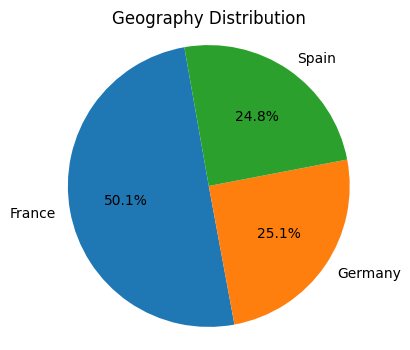

In [46]:
#Lets see the ratio in piechart
plt.figure(figsize=(4, 4))  
plt.pie(count.values, labels=count.index, autopct='%1.1f%%', startangle=100)
plt.axis('equal')  


plt.title('Geography Distribution')

# Grafiği göster
plt.show()

In [47]:
churn_mean = df.groupby("Geography")["Exited"].mean()
churn_mean

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

In [48]:
 df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [49]:
churn_sex_mean = df.groupby("Gender")["Exited"].mean()
churn_sex_mean 

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

In [50]:
# lets see product number and churn relation
churn_product_no =  df.groupby("NumOfProducts")["Exited"].mean()
churn_product_no

NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: Exited, dtype: float64

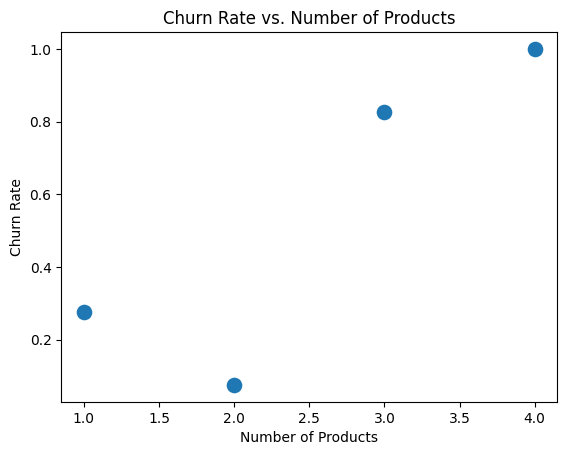

In [51]:
sns.scatterplot(data=churn_product_no, x="NumOfProducts", y=df.groupby("NumOfProducts")["Exited"].mean(),
               s = 150)

plt.title("Churn Rate vs. Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Churn Rate")

plt.show()
# As the number of products increases, the probability of churn also increases.
# but we should go further

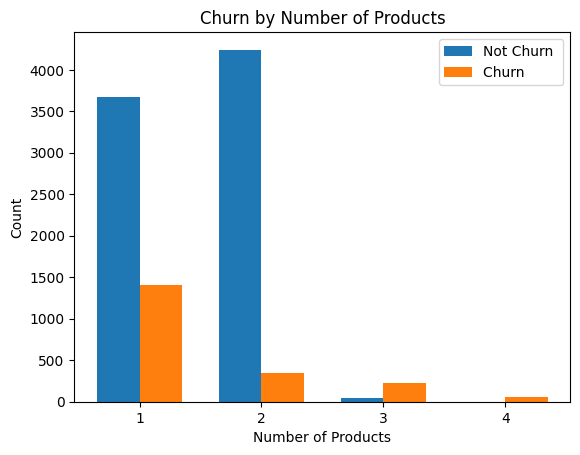

In [52]:
grouped = df.groupby(["NumOfProducts", "Exited"]).size().unstack().fillna(0)

# Create a bar chart
x = np.arange(len(grouped))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, grouped[0], width, label='Not Churn ')
bar2 = ax.bar(x + width/2, grouped[1], width, label='Churn ')

# Add labels, title, and legend
ax.set_xlabel('Number of Products')
ax.set_ylabel('Count')
ax.set_title('Churn by Number of Products')
ax.set_xticks(x)
ax.set_xticklabels(grouped.index)
ax.legend()
plt.show()


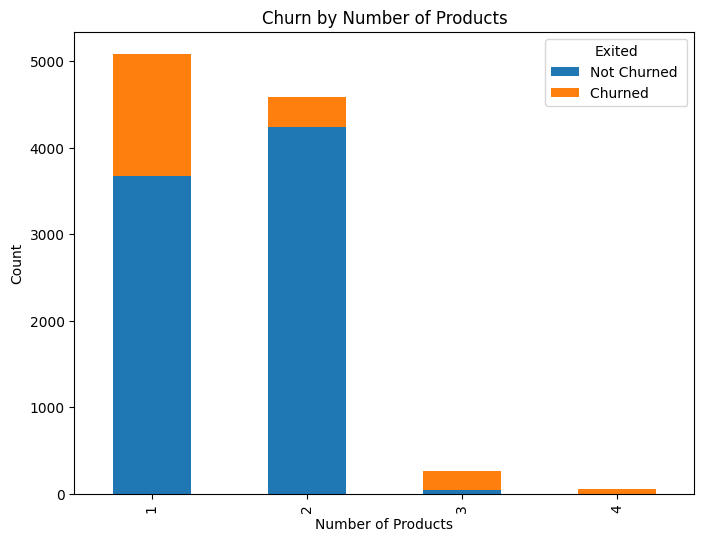

In [53]:
# lets go further to see details about number of products and churn

category_counts = df.groupby(["NumOfProducts", "Exited"]).size().unstack()


category_counts.plot(kind="bar", stacked=True, figsize=(8, 6))


plt.title("Churn by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["Not Churned ", "Churned "])

# Grafiği göster
plt.show()

In [54]:
# lets go further NumberOfProducts Ratio
df1.NumOfProducts.value_counts() / len(df1)
# So we cant say that as the number of products increases, 
# the probability of churn also increases.
# we need more info

NumOfProducts
1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: count, dtype: float64

In [55]:
# new column Churn_Status
df1["Churn_Status"] = df1["Exited"].replace({0: "Not Churn", 1: "Churn"})
df1

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn_Status
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Churn
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Not Churn
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Churn
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Not Churn
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Not Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Not Churn
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Not Churn
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Churn
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Churn


In [56]:
df1.Churn_Status.value_counts()

Churn_Status
Not Churn    7963
Churn        2037
Name: count, dtype: int64

In [57]:
df.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [58]:
df.CreditScore.median()
# median and mean are so close
# let see KDE distribution

652.0

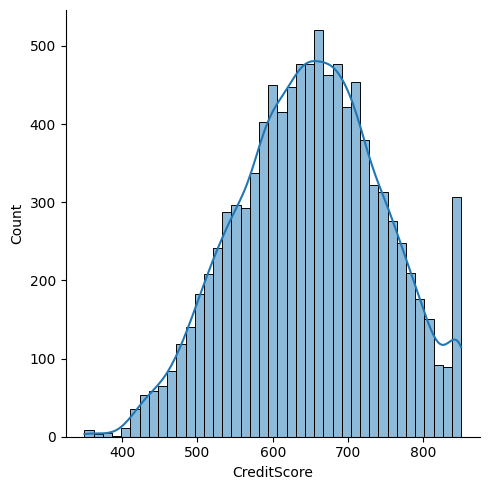

In [59]:
sns.displot(df.CreditScore, kde=True);


<Axes: >

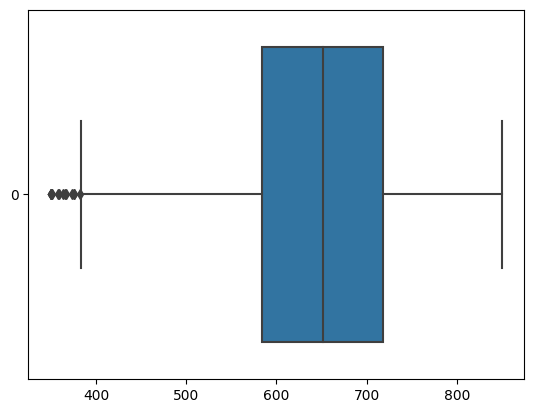

In [60]:
sns.boxplot(df["CreditScore"], orient="h")

In [61]:
# Kredi skoru sıralamasını oluşturuyoruz
sorted_df = df1.sort_values(by="CreditScore")

# Churn başlangıcı için ilk kredi skoru değerini bulun
churn_start_score = None
for index, row in sorted_df.iterrows():
    if row["Churn_Status"] == "Churn":
        churn_start_score = row["CreditScore"]
        break

# Churn başlangıcı için kredi skoru eşik değerini yazdırın
print("Churn Start Score:", churn_start_score)


Churn Start Score: 350


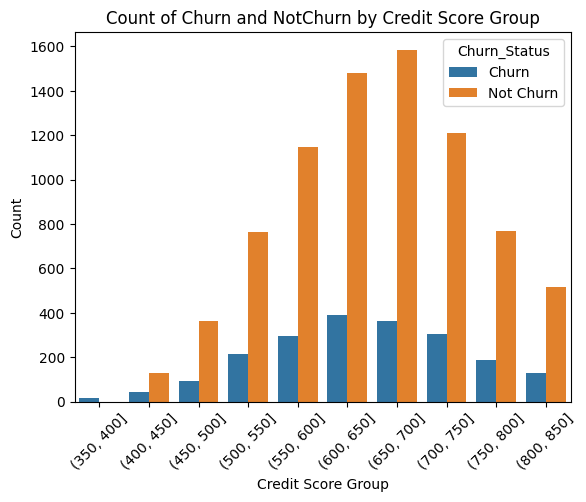

In [62]:
# Kredi skorlarını gruplayarak ChurnStatus'a göre çubuk grafiği çizin
df1["CreditScoreGroup"] = pd.cut(df1["CreditScore"], bins=range(350, 851, 50))
sns.countplot(data=df1, x="CreditScoreGroup", hue="Churn_Status")
plt.xlabel("Credit Score Group")
plt.ylabel("Count")
plt.title("Count of Churn and NotChurn by Credit Score Group")
plt.xticks(rotation=45)
plt.show()


In [63]:
df1.CreditScoreGroup

0       (600, 650]
1       (600, 650]
2       (500, 550]
3       (650, 700]
4       (800, 850]
           ...    
9995    (750, 800]
9996    (500, 550]
9997    (700, 750]
9998    (750, 800]
9999    (750, 800]
Name: CreditScoreGroup, Length: 10000, dtype: category
Categories (10, interval[int64, right]): [(350, 400] < (400, 450] < (450, 500] < (500, 550] ... (650, 700] < (700, 750] < (750, 800] < (800, 850]]

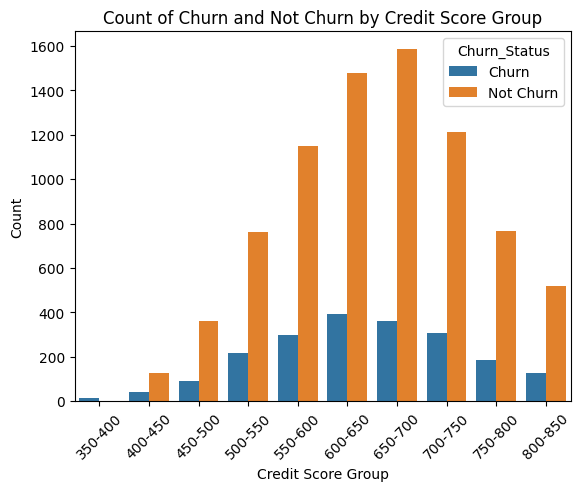

In [66]:

# Kredi skorlarını gruplayarak ChurnStatus'a göre çubuk grafiği çizelim
df1["CreditScoreGroup"] = pd.cut(df1["CreditScore"], bins=range(350, 851, 50))

# Çubuk grafiği çizin ve x-ekseni etiketlerini özelleştirelim
sns.countplot(data=df1, x="CreditScoreGroup", hue="Churn_Status")

# x-ekseni etiketlerini özelleştirelim
x_labels = [f"{bin.left}-{bin.right}" for bin in df1["CreditScoreGroup"].cat.categories]
plt.xlabel("Credit Score Group")
plt.ylabel("Count")
plt.title("Count of Churn and Not Churn by Credit Score Group")
plt.xticks(range(len(x_labels)), x_labels, rotation=45)

plt.show()
